In [1]:
import time
from collections import OrderedDict

from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50, PARAM_UPDATE, PARAM_UPDATE_IMPROVED, PROVENANCE
from experiments.models.googlenet import googlenet
from experiments.models.resnet152 import resnet152
from experiments.models.resnet18 import resnet18
from experiments.models.resnet50 import resnet50
from experiments.models.mobilenet import mobilenet_v2
from experiments.plots.util import *

In [2]:
ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'
VERSION = 'version'
FINE_TUNED = 'fine-tuned'
OUTDOOR = 'outdoor'
FOOD = 'food'

In [3]:
# get all file sin the directory
all_files = all_files_in_dir(ROOT_LOG_DIR)
node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
# for all files extract the metadata (e.g. what model and dataset is used)
U_IDS = 'u_ids'

files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
# add a mapping: use_case -> model id
files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
# add the parsed events
files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]

In [4]:
valid_joined = join_server_and_node_meta(files_and_meta)

In [5]:
times = extract_times(valid_joined)

In [6]:
def plot_median_detailed_save_times(data, save_path=None, _rearrange_u2=True, model_params=False, lgd_right=False, reorder_labels=False):
    x_labels = list(data.keys())
    if _rearrange_u2:
        x_labels = rearrange_u2(x_labels)

    labels = ['pickle parameters', 'hash parameters', 'persist', 'other']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        tmp[0] = tmp[0] - sum(tmp[1:])

        # rest has to be the last not the first value
        rest = tmp.pop(0)
        tmp.append(rest)


        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T
    plot_detailed_times(plot_data, labels, x_labels, save_path, model_params=model_params, lgd_right=lgd_right, reorder_labels=reorder_labels)

In [7]:

def plot_median_detailed_recover_times(data, save_path=None, ignore_check_env=False, _rearrange_u2=False, lgd_right=False, reorder_labels=False):
    x_labels = list(data.keys())
    if _rearrange_u2:
        x_labels = rearrange_u2(x_labels)
    labels = ['load', 'recover', 'check params', 'check env']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        if ignore_check_env:
            tmp = tmp[:3]
            labels = labels[:3]
        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T

    plot_detailed_times(plot_data, labels, x_labels, save_path, lgd_right, lgd_right=lgd_right, reorder_labels=reorder_labels)

In [8]:
# BASELINE SAVE TIMES

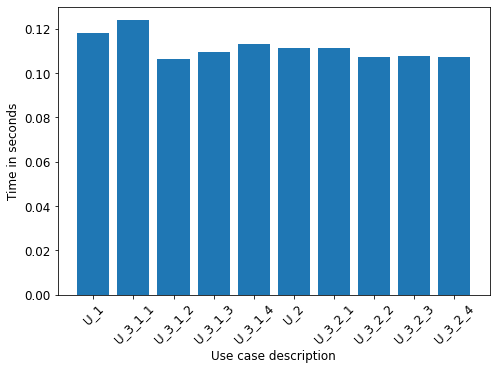

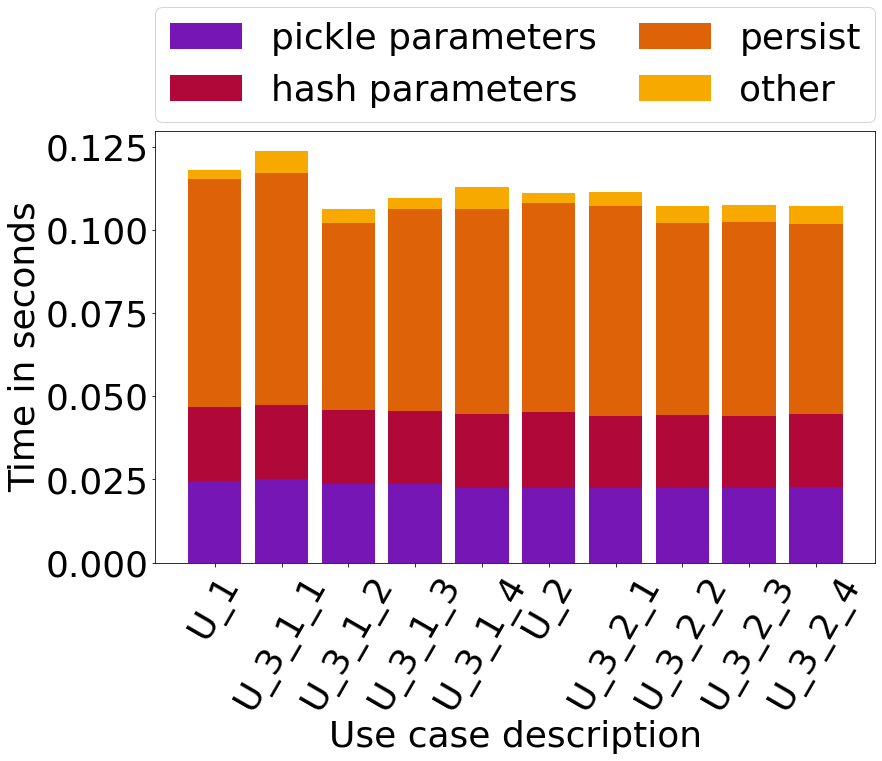

In [9]:
data = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

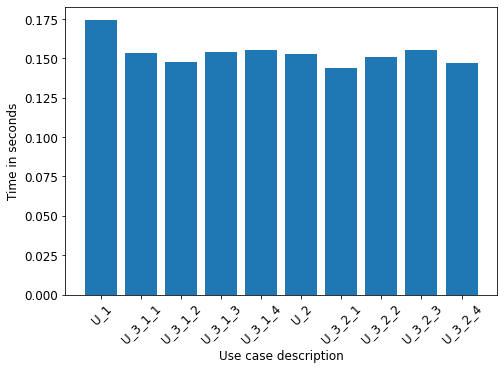

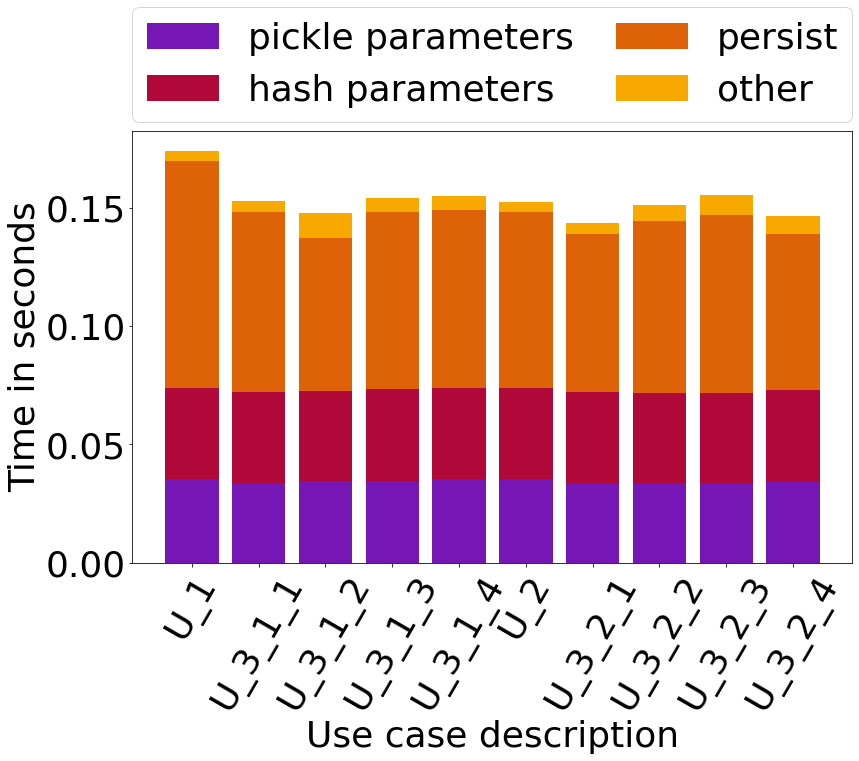

In [10]:
data = filter_meta(times, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

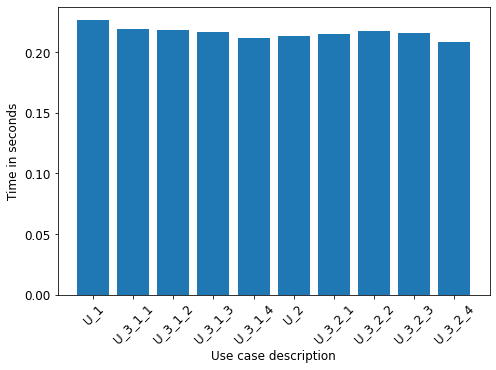

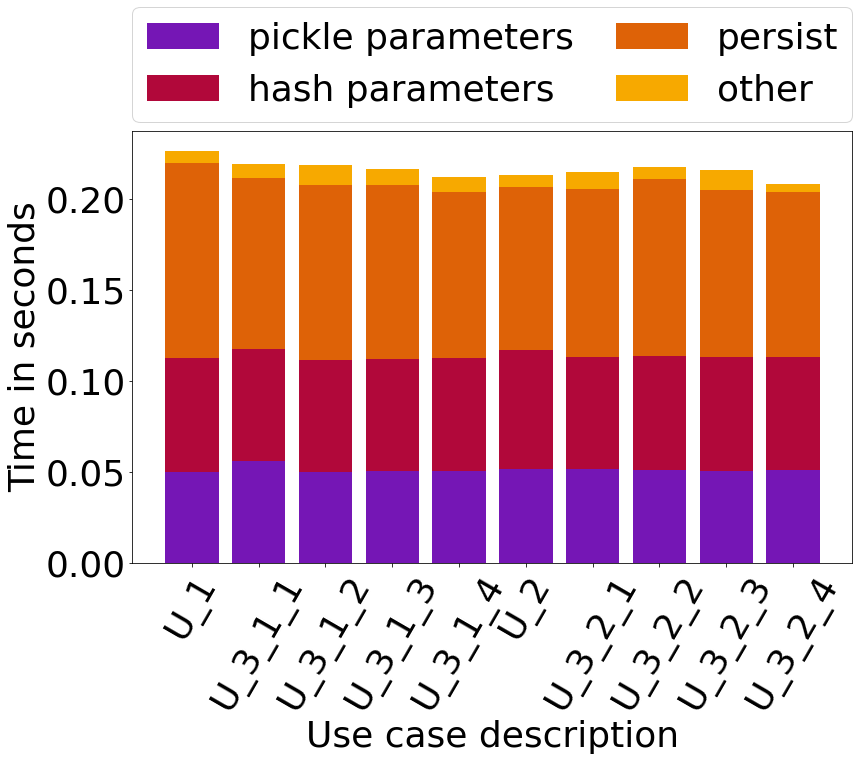

In [11]:
data = filter_meta(times, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

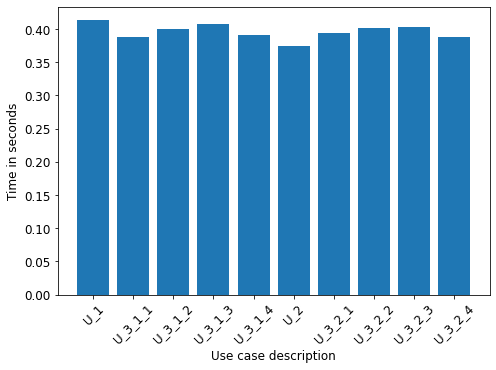

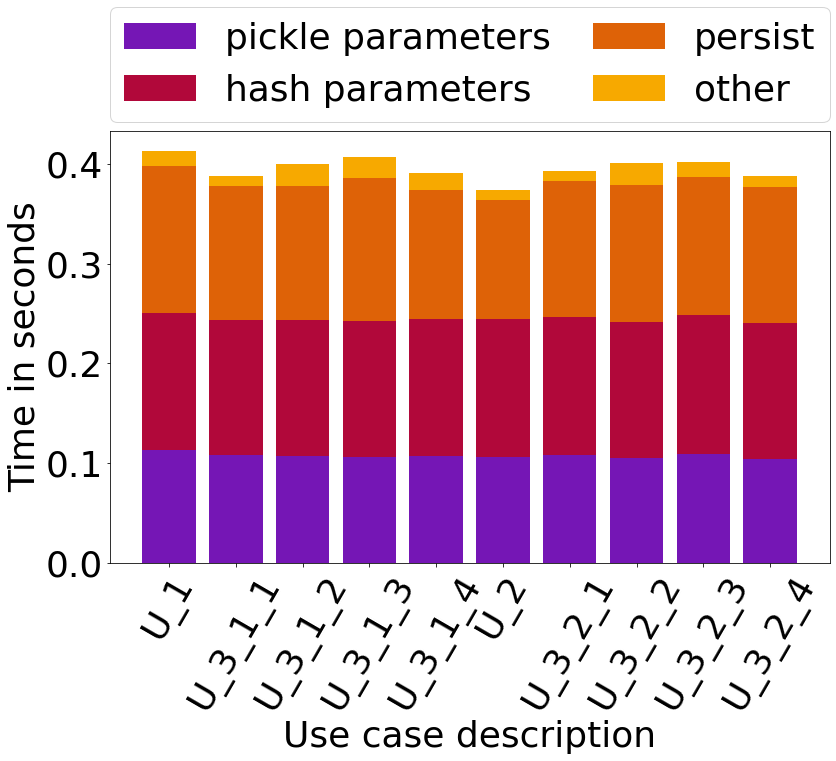

In [12]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

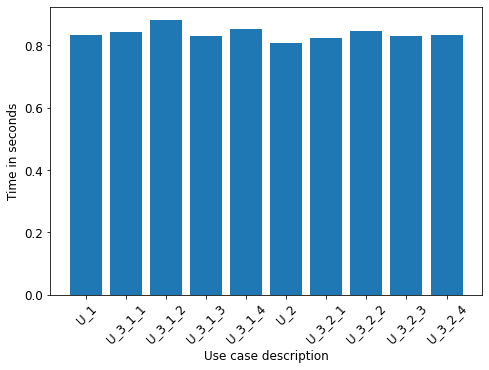

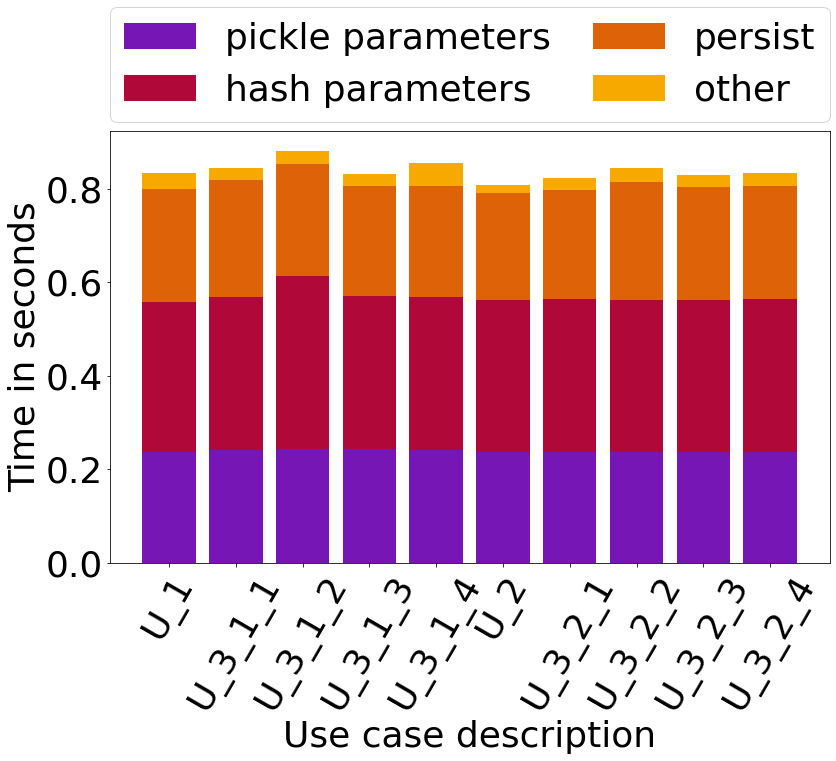

In [13]:
data = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

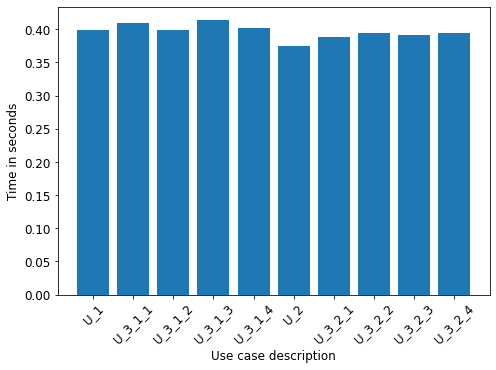

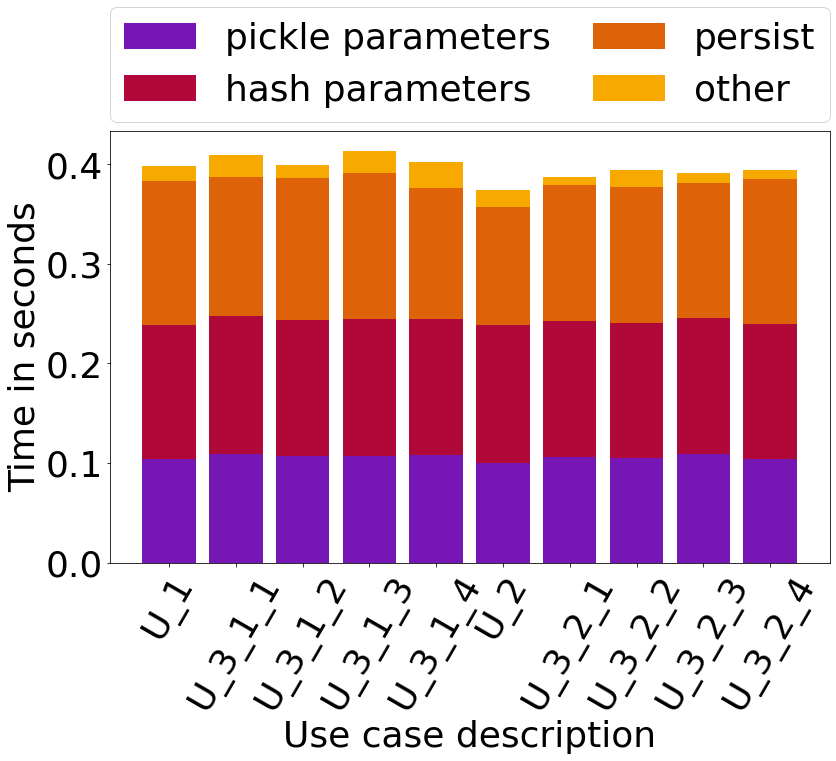

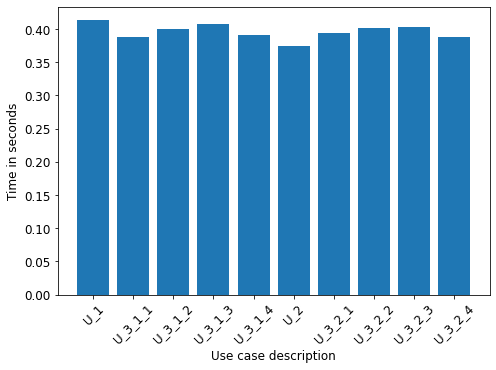

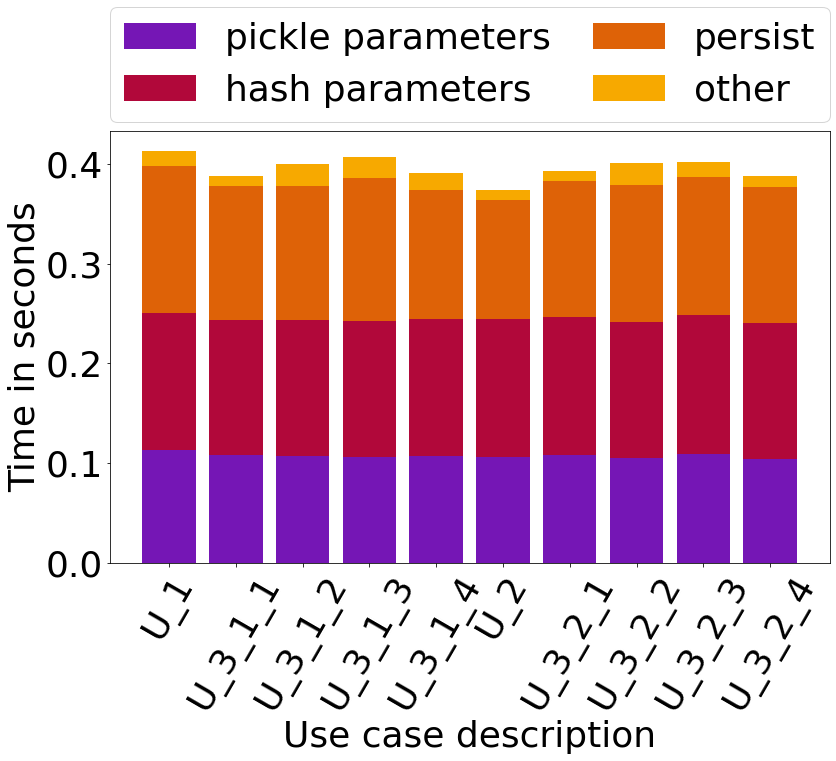

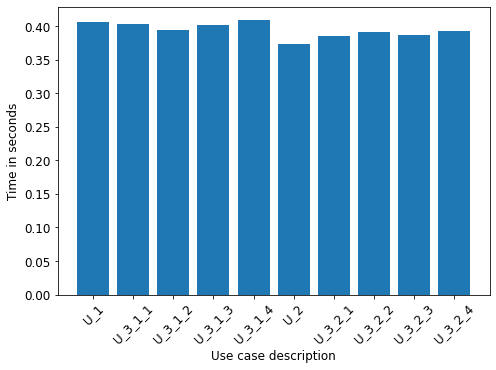

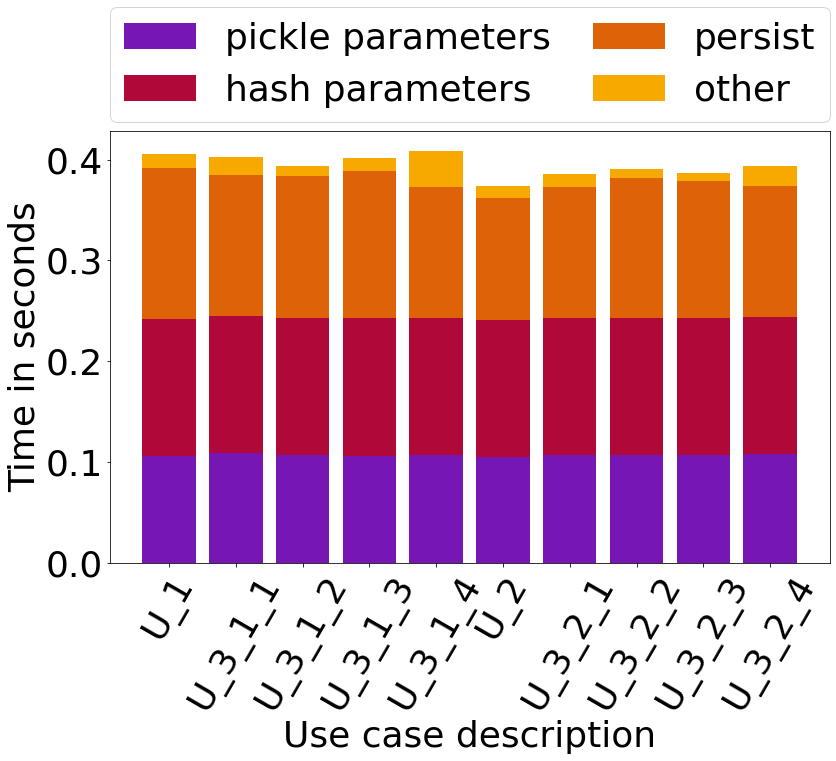

In [14]:
# Save time not dependent on dataset
# AND
# Save time not dependent on version vs fine-tuned
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, save_path='./saved-plots/baseline/detailed-resnet50-save-time-version-food')

data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, save_path='./saved-plots/baseline/detailed-resnet50-save-time-finetuned-outdoor')

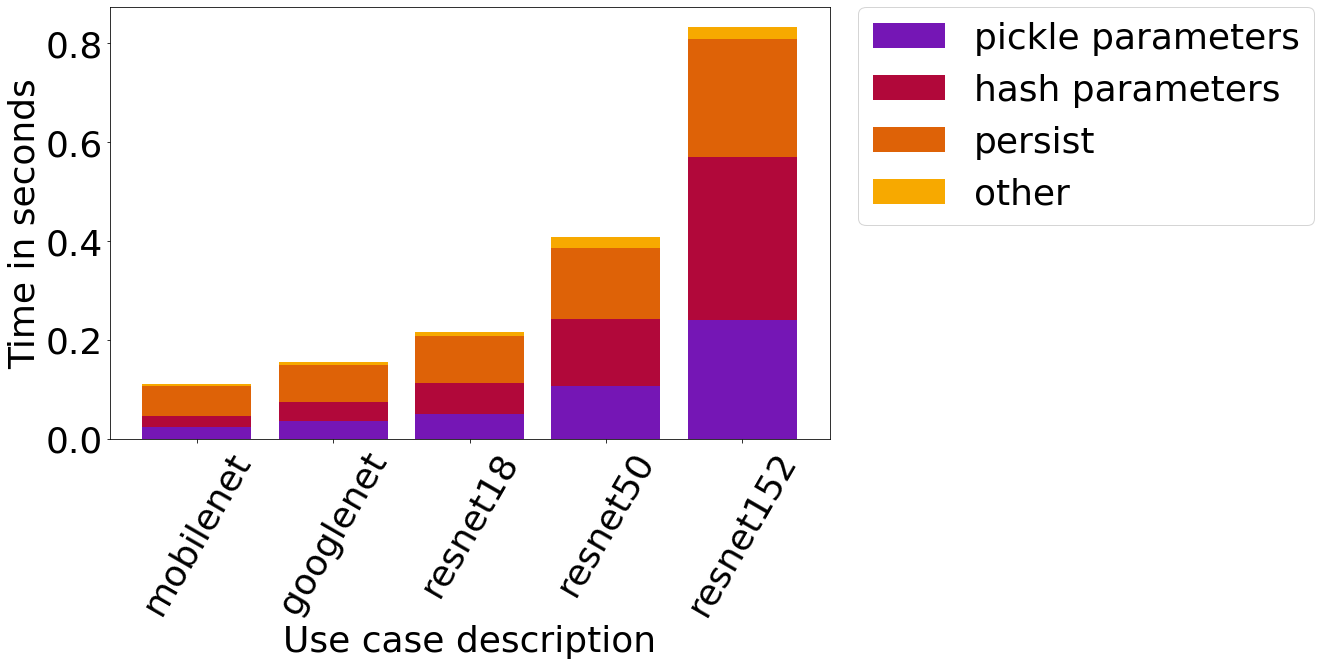

In [15]:
#################################
# All U3_1_3 save times
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u3_save_times = OrderedDict()
for m in models:
    data = filter_meta(times, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
    median_detailed_save = median_detailed_save_times(data)

    u3_save_times[m] = median_detailed_save['U_3_1_3']

plot_median_detailed_save_times(u3_save_times, _rearrange_u2=False, save_path='./saved-plots/baseline/detailed-save_times_per_model', lgd_right=True)

In [16]:
# BASELINE RECOVER TIMES

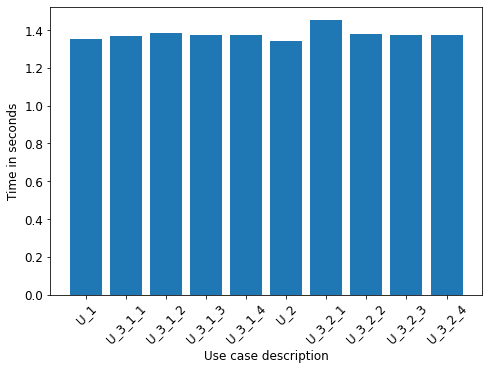

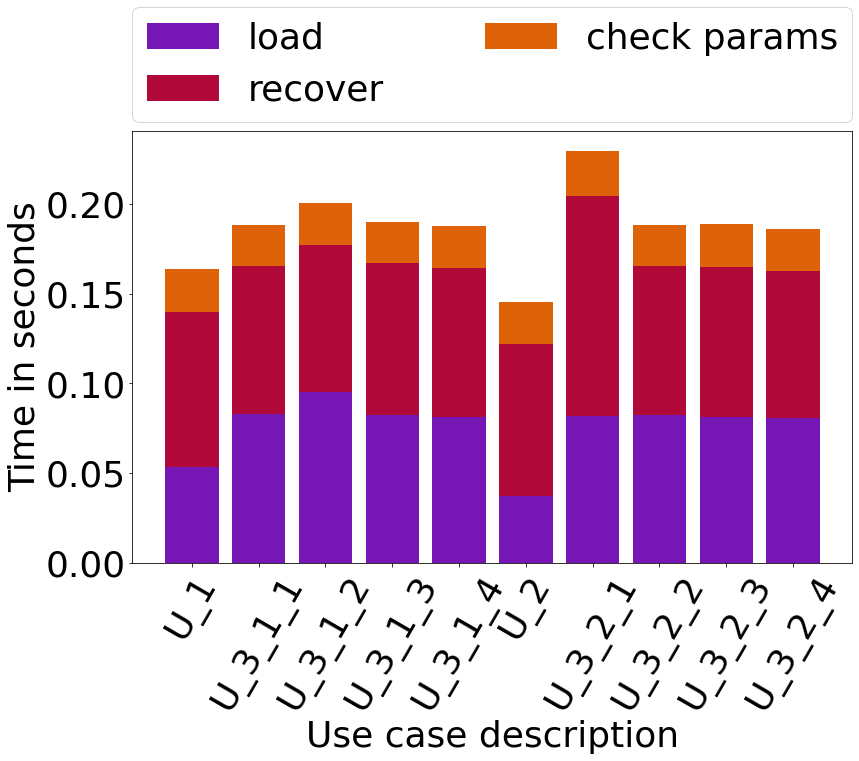

In [17]:
data = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, ignore_check_env=True)

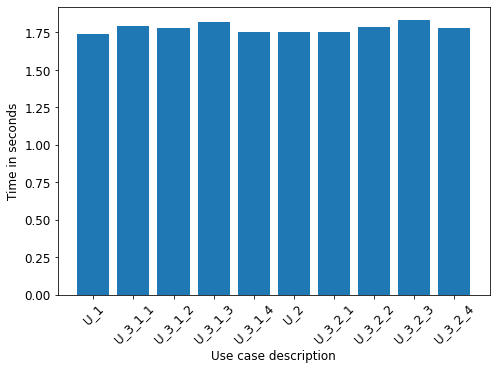

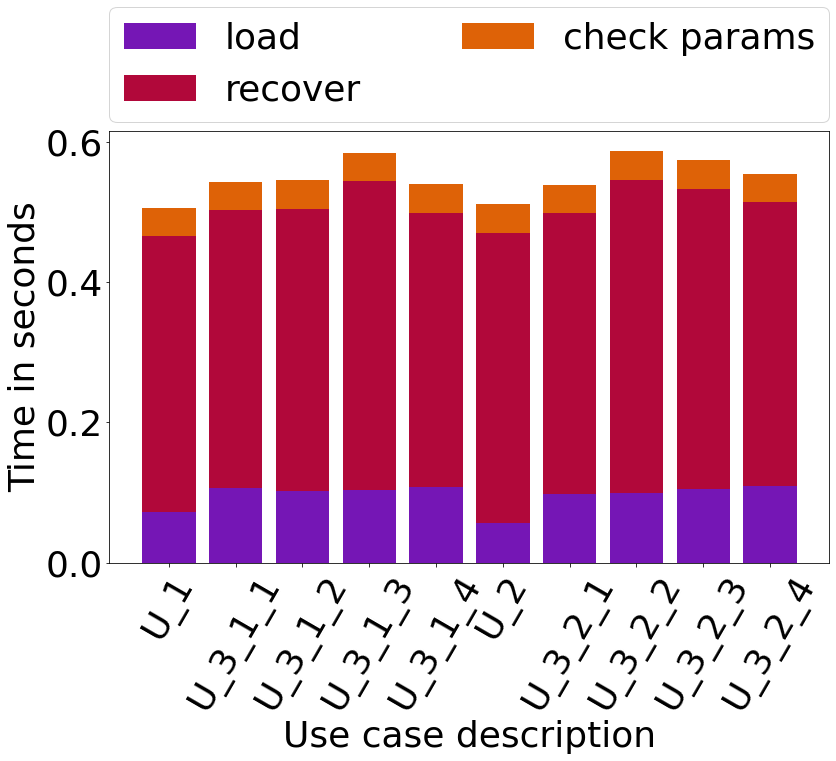

In [18]:
data = filter_meta(times, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, ignore_check_env=True)

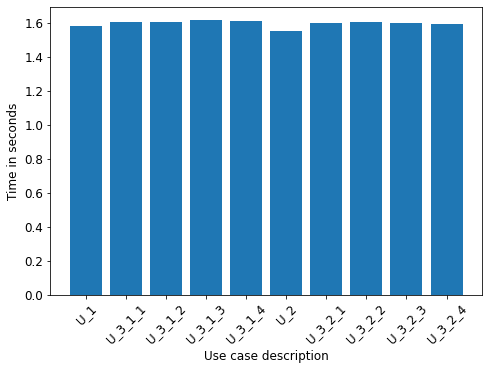

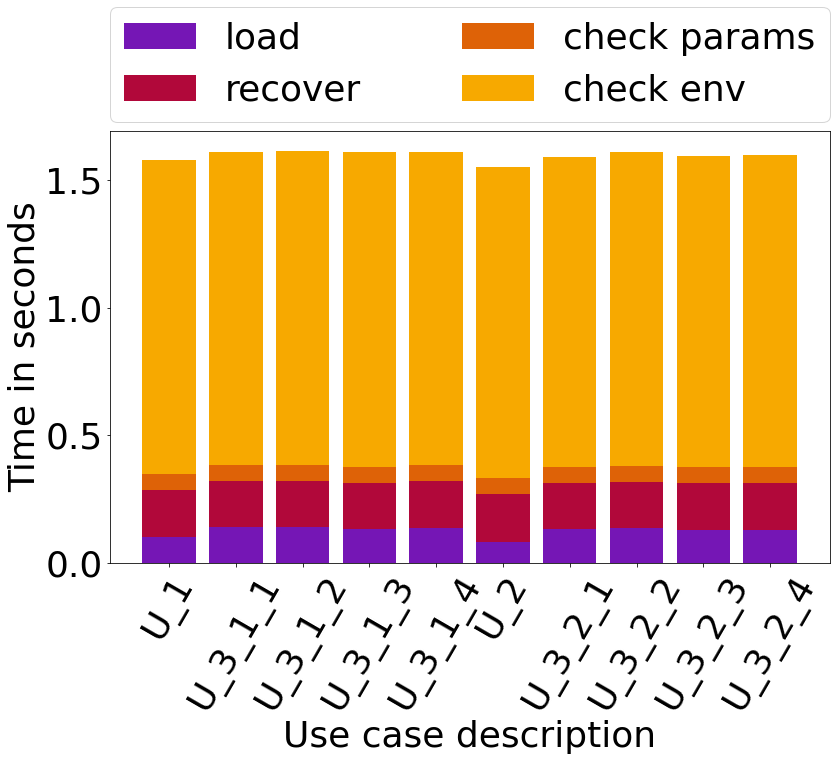

In [19]:
data = filter_meta(times, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

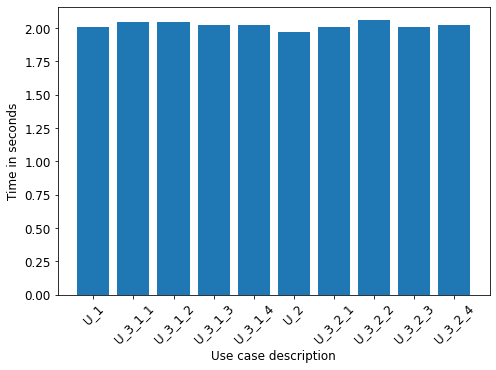

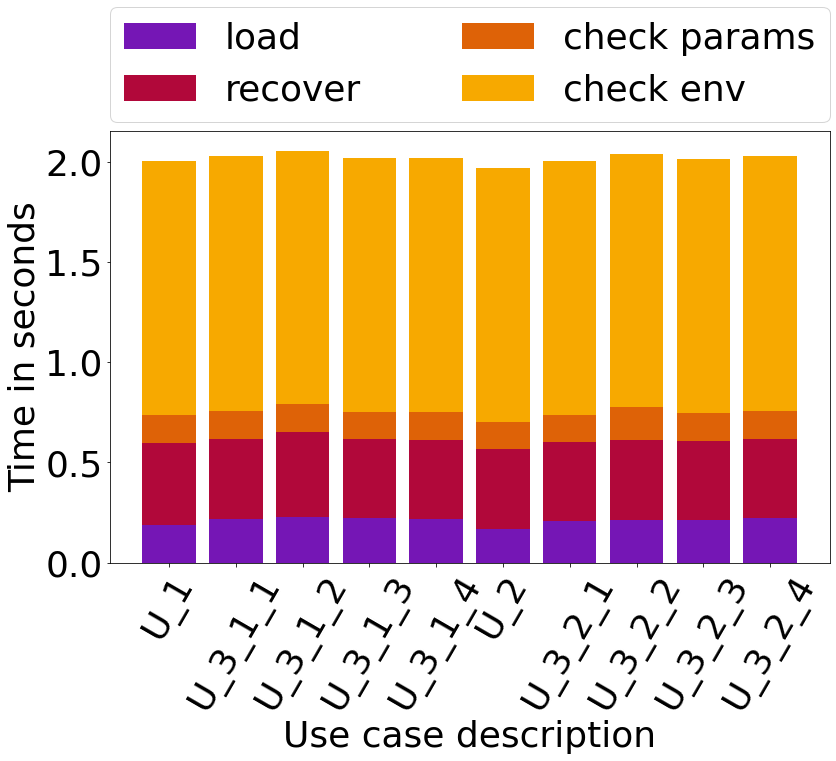

In [20]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, save_path='./saved-plots/baseline/detailed-resnet50-recover-time-version-food')

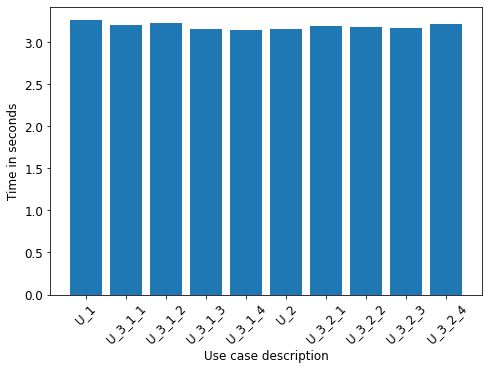

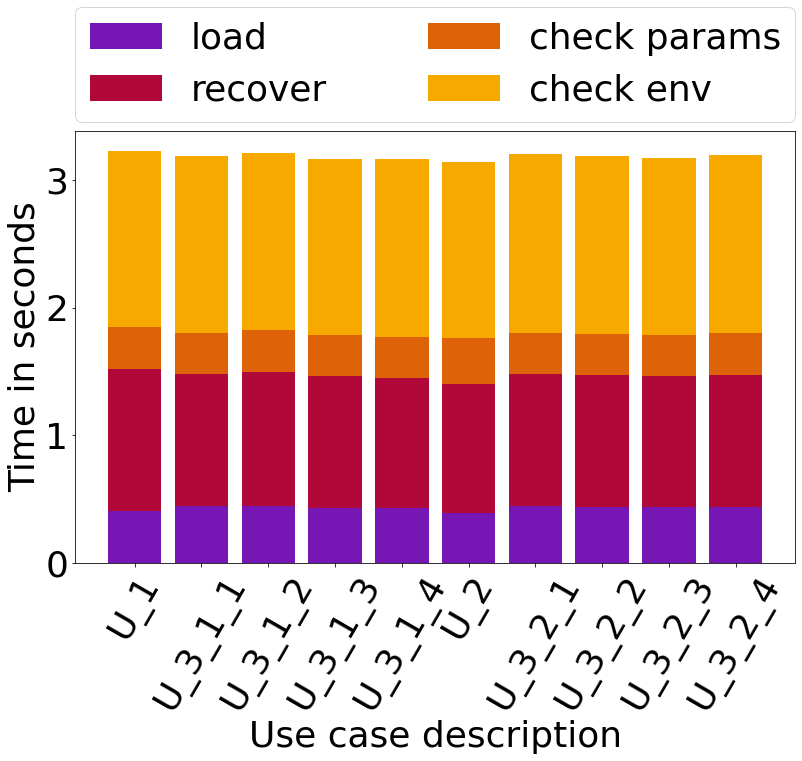

In [21]:
data = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

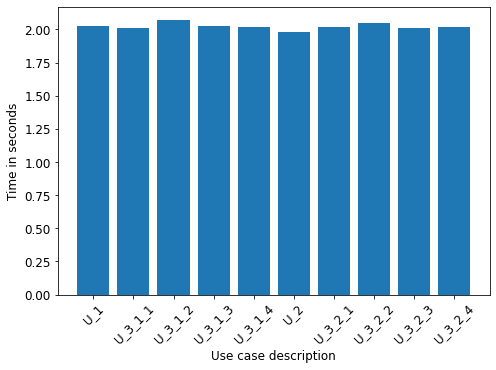

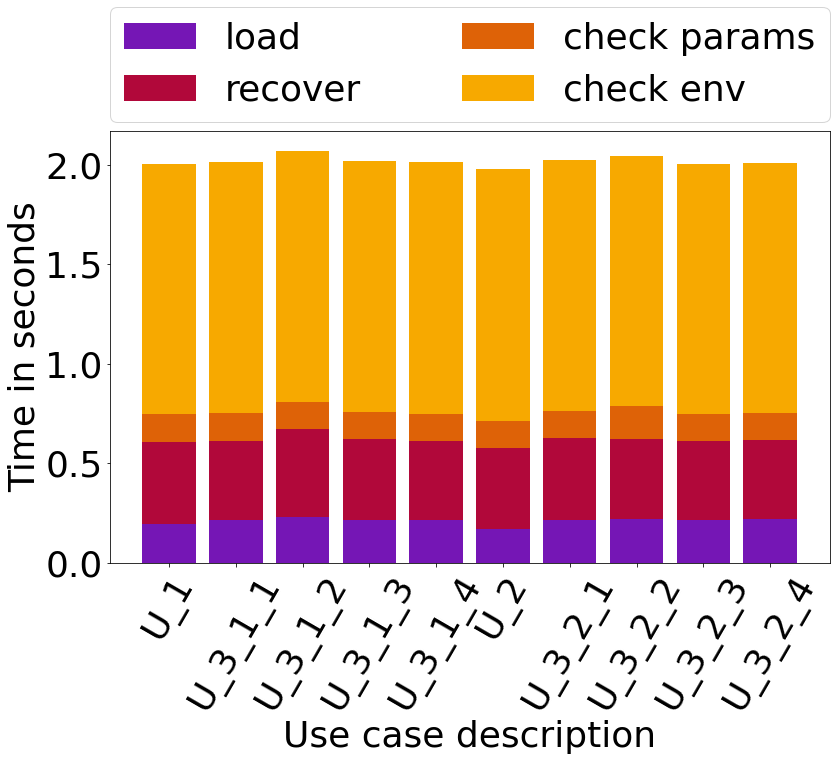

In [22]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

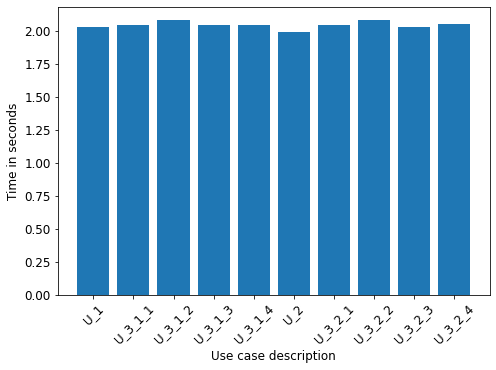

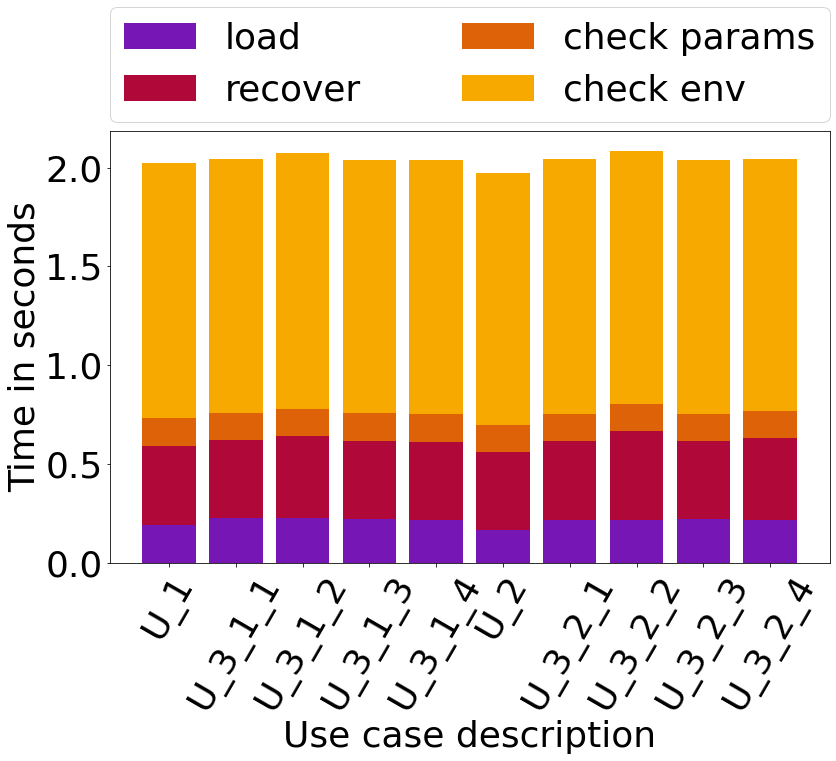

In [23]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, save_path='./saved-plots/baseline/detailed-resnet50-recover-time-finetuned-outdoor')

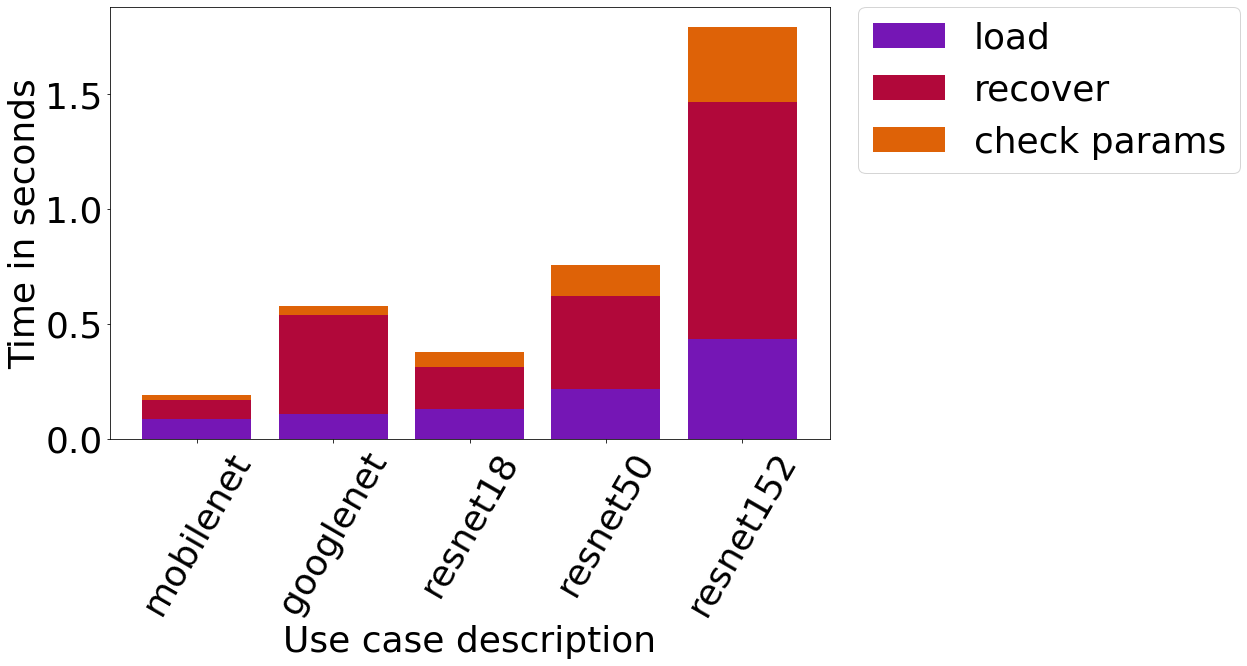

In [24]:
#################################
# All U3_1_3 recover times
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u3_recover_times = OrderedDict()
for m in models:
    data = filter_meta(times, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
    median_detailed_recover = median_detailed_recover_times(data)

    u3_recover_times[m] = median_detailed_recover['U_3_1_3']

plot_median_detailed_recover_times(u3_recover_times, ignore_check_env=True, _rearrange_u2=False, save_path='./saved-plots/baseline/detailed-recover_times_per_model', lgd_right=True)

In [25]:
# googlenet baseline
tmp = valid_joined[47]['server'][0]['events'][10].children[3]
print(tmp)

U_4: 1.8299647680s 
GAPTIME: 4.622e-05s 
recover_model-60d053d83efbc61227ba4f00 -- all: 1.8280340710s 
	GAPTIME: 0.00012723700000000002s 
	recover_model -- load_model_info_rec_files: 0.1110590760s 
		GAPTIME: 5.0770000000000003e-05s 
		mmlib_dict_pers -- recover_dict -- collection(model_info): 0.0000365600s 
		GAPTIME: 0.0032693260000000003s 
		mmlib_dict_pers -- recover_dict -- collection(recover_info): 0.0000371450s 
		GAPTIME: 0.001076935s 
		mmlib_file_pers -- recover_file: 0.0270191130s 
		GAPTIME: 5.9493e-05s 
		mmlib_file_pers -- recover_file: 0.0710504690s 
		GAPTIME: 5.0412000000000005e-05s 
		mmlib_dict_pers -- recover_dict -- collection(environment): 0.0000434570s 
		GAPTIME: 0.008365396s 
	GAPTIME: 1.7438e-05s 
	recover_model -- recover_from_info: 1.7168054070s 
		GAPTIME: 0.45045783s 
		_check_weights -- _all: 0.0399642300s 
		GAPTIME: 5.1769000000000005e-05s 
		_check_env -- _all: 1.2234706750s 
		GAPTIME: 0.002860903s 
	GAPTIME: 2.4913e-05s 
GAPTIME: 0.001884477s 



In [26]:
# resnet18 baseline
tmp = valid_joined[2]['server'][0]['events'][10].children[3]
print(tmp)


U_4: 1.6167958930s 
GAPTIME: 5.3957000000000005e-05s 
recover_model-60d00aafb4dc821f17cb405d -- all: 1.6150261330s 
	GAPTIME: 0.00012074600000000001s 
	recover_model -- load_model_info_rec_files: 0.1211714430s 
		GAPTIME: 4.8650000000000003e-05s 
		mmlib_dict_pers -- recover_dict -- collection(model_info): 0.0000362370s 
		GAPTIME: 0.001748647s 
		mmlib_dict_pers -- recover_dict -- collection(recover_info): 0.0000373450s 
		GAPTIME: 0.0009121690000000001s 
		mmlib_file_pers -- recover_file: 0.0188021650s 
		GAPTIME: 2.2276e-05s 
		mmlib_file_pers -- recover_file: 0.0961789830s 
		GAPTIME: 5.7465000000000006e-05s 
		mmlib_dict_pers -- recover_dict -- collection(environment): 0.0000510400s 
		GAPTIME: 0.003276466s 
	GAPTIME: 2.0489e-05s 
	recover_model -- recover_from_info: 1.4936890100s 
		GAPTIME: 0.189430482s 
		_check_weights -- _all: 0.0665135350s 
		GAPTIME: 4.3440000000000004e-05s 
		_check_env -- _all: 1.2334411920s 
		GAPTIME: 0.004260361s 
	GAPTIME: 2.4445e-05s 
GAPTIME: 0.0017

In [27]:
start = time.time_ns()
net = googlenet()
stop = time.time_ns()

print((stop-start) * 10**-9)

/Users/nils/Desktop/tmp/master-thesis/experiments/models/googlenet.py:57: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn('The default weight initialization of GoogleNet will be changed in future releases of '


1.362047


In [28]:
start = time.time_ns()
net = mobilenet_v2()
stop = time.time_ns()

print((stop-start) * 10**-9)

0.06214600000000001


In [29]:
start = time.time_ns()
net = resnet18()
stop = time.time_ns()

print((stop-start) * 10**-9)

0.135905


In [30]:
start = time.time_ns()
net = resnet50()
stop = time.time_ns()

print((stop-start) * 10**-9)

0.31305700000000003


In [31]:
start = time.time_ns()
net = resnet152()
stop = time.time_ns()

print((stop-start) * 10**-9)



0.745816
